"In this lab, we explore classification using the K-Nearest Neighbors approach. We use a customer churn dataset from the telecom industry which includes customer data, usage of long-distance, data usage, monthly revenue, type of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, include several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data include a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing, then use K-nearest neighbors to predict customer churn rates.

After completing this lab, you should have a working understanding of how to preprocess a variety of variables in order to apply the K-Nearest Neighbors algorithm, understand how to choose K, and understand how to evaluate model performance."

In [ ]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
w = pd.Series( data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot'])
le = LabelEncoder()
w1 = le.fit_transform(w)
w,w1

(0    cold
 1    cold
 2    warm
 3    cold
 4     hot
 5     hot
 6    warm
 7    cold
 8    warm
 9     hot
 dtype: object,
 array([0, 0, 2, 0, 1, 1, 2, 0, 2, 1]))

In [ ]:
lb = LabelBinarizer()
lb.fit_transform(w)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
#from datasetup import churndata, colors, palette
#sns.set_palette(palette)

We begin by importing the data. Examine the columns and data.


Notice that the data contains a unique ID, an indicator for phone customer status, total lifetime value, total revenue, and a bank-estimated churn score. We will not be using these features, so they can be dropped from the data.\n",


Begin by taking an initial look at the data, including both numeric and non-numeric features."

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/customer-churn.csv.csv')

In [ ]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df.describe()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.433551,0.421837,0.241358,0.286668,0.344881,0.343888,0.290217,0.673719,0.377396,0.592219,...,0.390317,0.054664,0.234559,0.430924,0.216669,0.073832,0.116996,0.058924,0.085475,0.114298
std,0.398231,0.493888,0.240223,0.452237,0.475363,0.475038,0.453895,0.468885,0.424234,0.491457,...,0.487856,0.227340,0.423753,0.495241,0.412004,0.261516,0.321438,0.235499,0.279607,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1.000000,0.317647,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes.value_counts()

int64      18
float64     5
dtype: int64

In [ ]:
df_uniques = df.nunique()

In [ ]:
df_uniques

months                          5
multiple                        2
gb_mon                         50
security                        2
backup                          2
protection                      2
support                         2
unlimited                       2
contract                        3
paperless                       2
monthly                      1585
satisfaction                    5
churn_value                     2
payment_Credit Card             2
payment_Mailed Check            2
internet_type_DSL               2
internet_type_Fiber Optic       2
internet_type_None              2
offer_Offer A                   2
offer_Offer B                   2
offer_Offer C                   2
offer_Offer D                   2
offer_Offer E                   2
dtype: int64

In [ ]:
binary_vars = list(df_uniques[df_uniques == 2].index)

In [ ]:
cat_vars = list(df_uniques[(df_uniques > 2) &(df_uniques < 6)].index)

In [ ]:
# cat_vars are all ordinals (have orders)
ord_vars = cat_vars

In [ ]:
num_vars = list(set(df.columns) - set(binary_vars) -set(ord_vars))

In [ ]:
df_uniques

months                          5
multiple                        2
gb_mon                         50
security                        2
backup                          2
protection                      2
support                         2
unlimited                       2
contract                        3
paperless                       2
monthly                      1585
satisfaction                    5
churn_value                     2
payment_Credit Card             2
payment_Mailed Check            2
internet_type_DSL               2
internet_type_Fiber Optic       2
internet_type_None              2
offer_Offer A                   2
offer_Offer B                   2
offer_Offer C                   2
offer_Offer D                   2
offer_Offer E                   2
dtype: int64

Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.

 Scale the data using one of the scaling methods discussed in the course.
 ,
 Save the processed dataframe as a comma-separated file: 'churndata_processed.csv'"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
mm = MinMaxScaler()

**Label Encoder** Encode target labels with value between 0 and n_classes-1. and also can be used to label any categorical variable when it is ordered.

**Ordinal Encoder**Encode categorical features as an integer array in order


Lets define the ordinal variables to be satisfaction , contract , months

We will use labelencoder insteadof ordinal incoder in this case only because the columns are ordered by nature. So the label encoder will encode them easily.



In [ ]:
le =LabelEncoder()
lb = LabelBinarizer()
oe = OrdinalEncoder()

In [ ]:
oe.fit_transform(df[['months']])

array([[0.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [ ]:
for column in ord_vars:
  df[column] = oe.fit_transform(df[[column]])

In [ ]:
df['satisfaction'].head()

0    2.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: satisfaction, dtype: float64

In [ ]:
columns_scaled = num_vars + ord_vars

In [ ]:
columns_scaled

['monthly', 'gb_mon', 'months', 'contract', 'satisfaction']

In [ ]:
for column in columns_scaled:
  df[column]=mm.fit_transform(df[[column]])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.433551,0.398231,0.0,0.000000,0.250000,0.750000,1.0
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
contract,7043.0,0.377396,0.424234,0.0,0.000000,0.000000,1.000000,1.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0


In [ ]:
for column in binary_vars:
  df[column] = lb.fit_transform(df[column])

* Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value). \n",

 Split the sample into training and test samples, with the test sample representing 40% of observations


    "* Estimate a K-Nearest Neighbors model, using K=3.\n",
    "* Examine the Precision, Recall, F-1 Score, and Accuracy of the classification
    
    "* Use a graphic to illustrate the Confusion Matrix "

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


In [ ]:
# define X , y
y = df['churn_value']
X = df.drop('churn_value' , axis= 1)

In [ ]:
## split data
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size =0.4)

In [ ]:
X_train.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
6456,0.00,0,0.141176,0,1,0,0,1,0.5,0,...,1,0,0,0,0,0,0,0,0,0
6792,0.25,0,0.164706,0,0,1,0,1,0.0,1,...,1,0,1,0,0,0,0,1,0,0
3429,0.00,0,0.858824,0,0,1,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2770,0.25,0,0.811765,1,0,0,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
2143,0.50,0,0.317647,0,0,1,0,1,0.5,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn= knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2082
           1       0.79      0.69      0.74       736

    accuracy                           0.87      2818
   macro avg       0.84      0.81      0.83      2818
weighted avg       0.87      0.87      0.87      2818

Accuracy score:  0.87
F1 Score:  0.74


<Axes: >

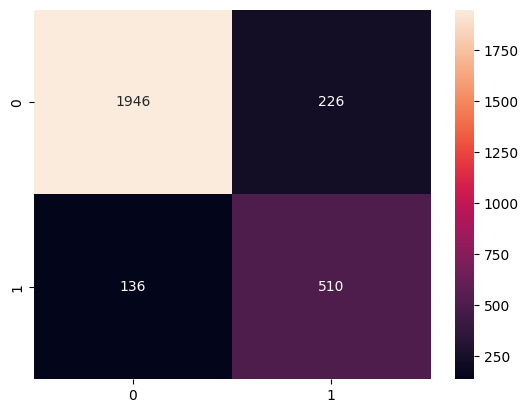

In [ ]:
import seaborn as sb
sb.heatmap(confusion_matrix(y_pred,y_test),annot =True ,fmt='d')

 Question 6

    "* To determine the right value for K, examing results for values of K from 1 to 40.


    "* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy)


    "* Generate charts which plot each of these measures as a function of K.
    
    "* What do these charts suggest about the optimal value for K?"

In [ ]:
k_max = 40
f1_scores = list()
error_rates = list() # 1_accuracy
for k in range(1,k_max):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn= knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  f1_scores.append((k,round(f1_score(y_test,y_pred),3)))
  error = 1-round(accuracy_score(y_test,y_pred),3)
  error_rates.append((k,error))

In [ ]:
f1_results = pd.DataFrame(f1_scores, columns=['k','f1_score'])

In [ ]:
error_rates_df = pd.DataFrame(error_rates,columns=['k','1-accuracy'])

In [ ]:
f1_results

,k,f1_score
0,1,0.725
1,2,0.692
2,3,0.742
3,4,0.742
4,5,0.762
5,6,0.740
6,7,0.755
7,8,0.747
8,9,0.762
9,10,0.747


<Figure size 1800x1200 with 0 Axes>

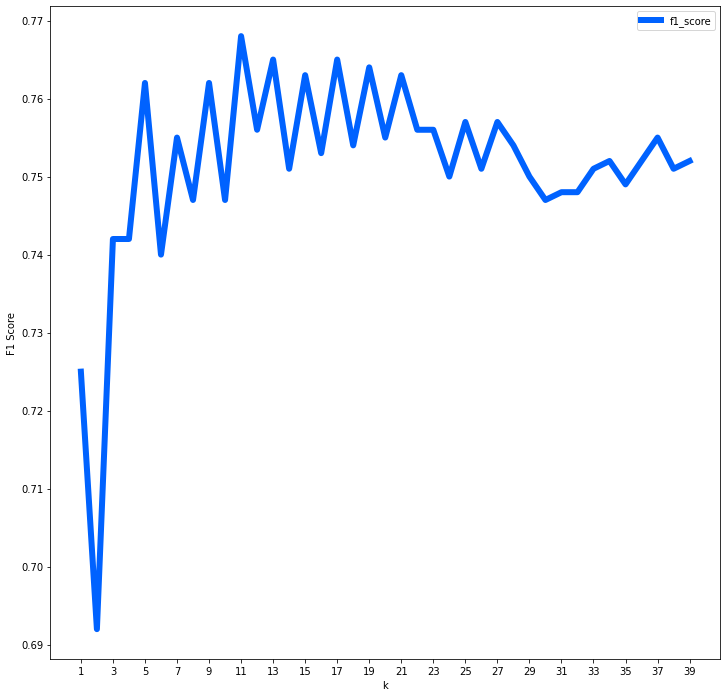

In [ ]:
# Plot F1 results\n",
#    "sns.set_context('talk')\n",
#    "sns.set_style('ticks')\n",
#    "\n",
plt.figure(dpi=300)
ax = f1_results.set_index('k').plot(color=colors[0], figsize=(12, 12), linewidth=6)
ax.set(xlabel='k', ylabel='F1 Score')
ax.set_xticks(range(1, k_max, 2))


<Figure size 1800x1200 with 0 Axes>

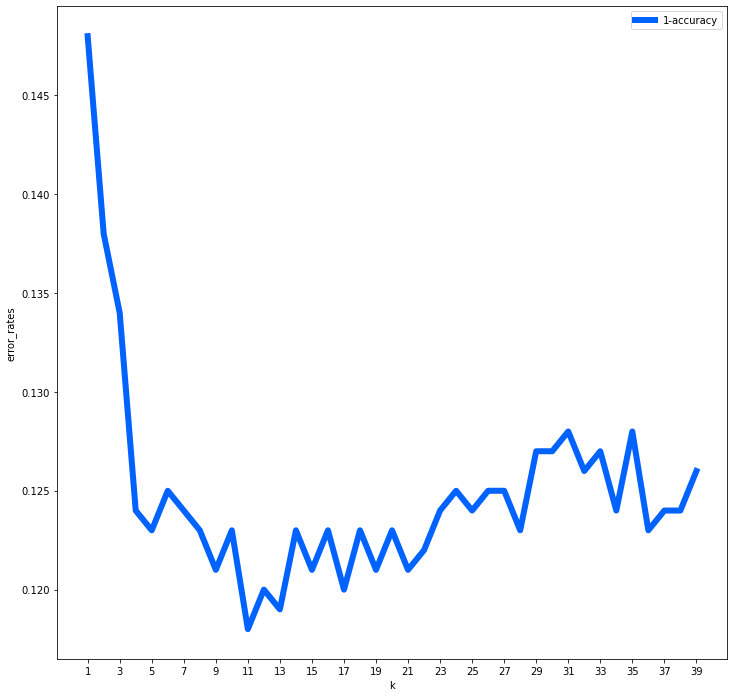

In [ ]:
plt.figure(dpi=300)
ax = error_rates_df.set_index('k').plot(color=colors[0], figsize=(12, 12), linewidth=6)
ax.set(xlabel='k', ylabel='error_rates')
ax.set_xticks(range(1, k_max, 2))